In [ ]:
pip install pycaret

In [ ]:
pip install pycaret[full]

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

In [ ]:
# Only enable critical logging (Optional)
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [59]:
def what_is_installed():
    from pycaret import show_versions
    show_versions()



In [ ]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
y = get_data('airline', verbose=False)

In [ ]:
fh = 12
fold = 3

In [ ]:
fig_kwargs = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [ ]:
eda = TSForecastingExperiment()
eda.setup(data=y, fh=fh, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,3859
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


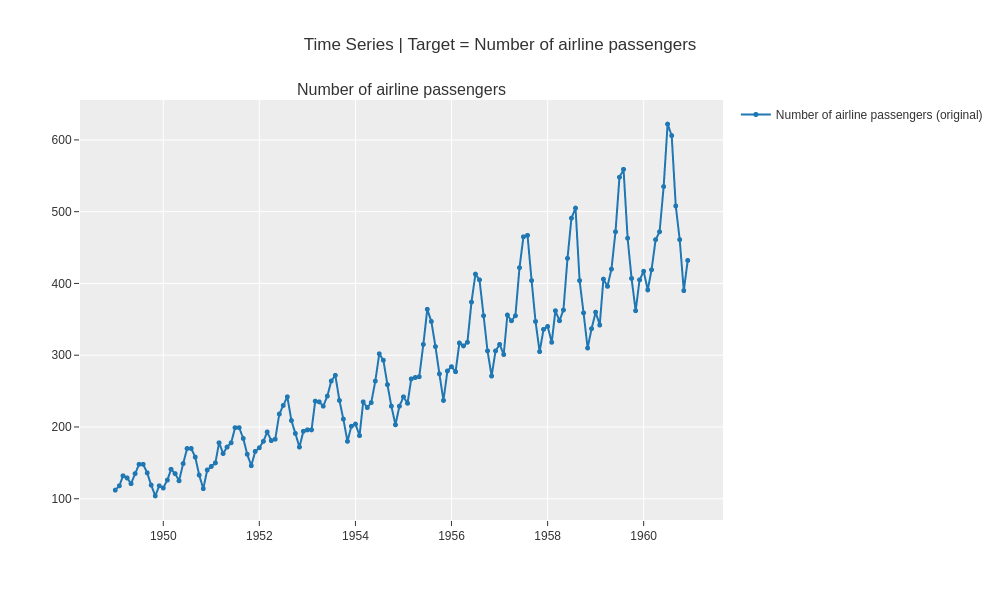

In [ ]:
eda.plot_model()

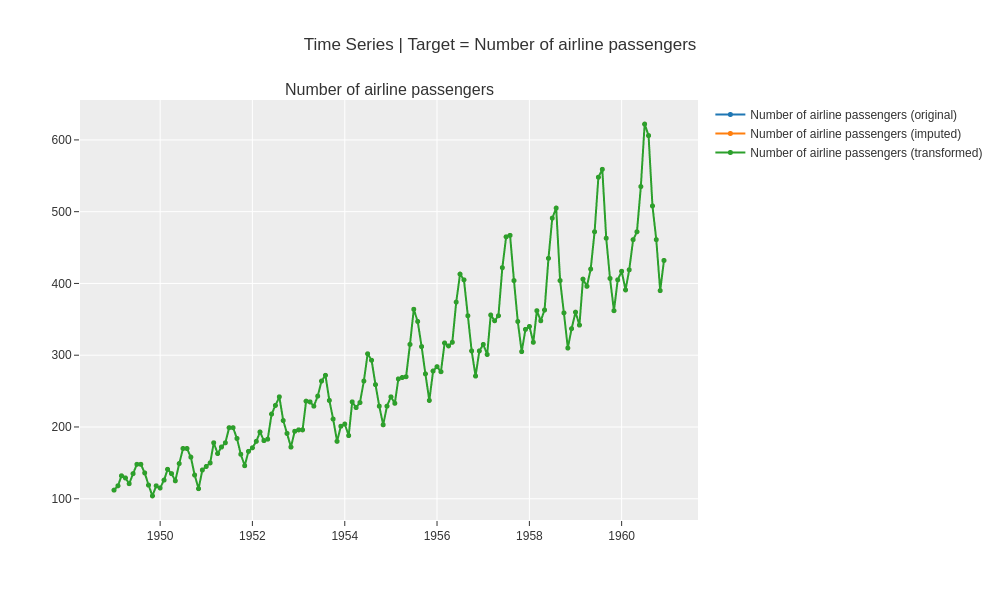

In [ ]:
eda.plot_model(data_kwargs={"plot_data_type": ["original", "imputed", "transformed"]})

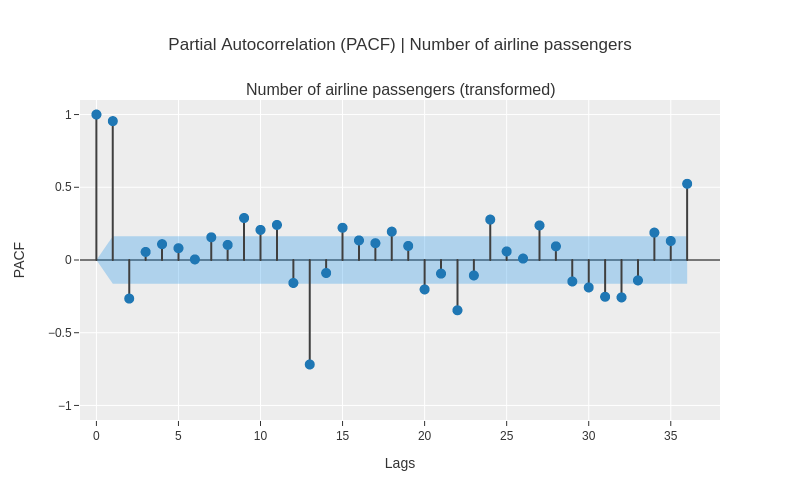

In [ ]:
eda.plot_model(plot="pacf", data_kwargs={'nlags':36}, fig_kwargs={'height': 500, "width": 800})

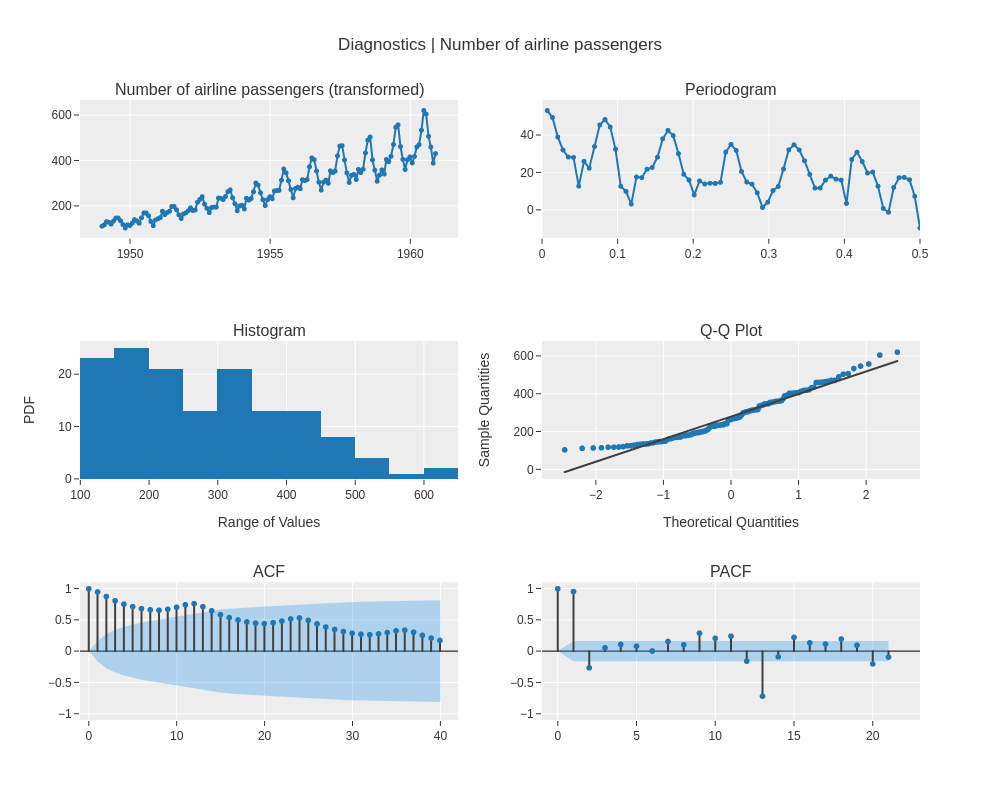

In [ ]:
eda.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [ ]:
exp = TSForecastingExperiment()
exp.setup(data=y, fh=fh, fold=fold, fig_kwargs=fig_kwargs, session_id=42)

,Description,Value
0,session_id,42
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model = exp.create_model("arima", order=(1,1,0), seasonal_order=(0,1,0,12))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3535,0.4103,10.3216,13.4315,0.0255,0.0260,0.9413
1,1957-12,0.6844,0.6853,20.9235,23.2653,0.0581,0.0560,0.8582
2,1958-12,1.5988,1.4673,45.6850,47.6955,0.1066,0.1132,0.4911
Mean,NaT,0.8789,0.8543,25.6434,28.1308,0.0634,0.0651,0.7635
SD,NaT,0.5267,0.4477,14.8178,14.4051,0.0333,0.0362,0.1956


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Out-of-sample Forecasts
y_predict = exp.predict_model(model)
y_predict

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.6999,0.7757,21.3121,26.7998,0.0480,0.0462,0.8703


,y_pred
1960-01,424.7154
1960-02,408.1599
1960-03,472.4447
1960-04,463.0139
1960-05,487.5134
1960-06,540.0299
1960-07,616.5423
1960-08,628.0557
1960-09,532.5688
1960-10,477.0820


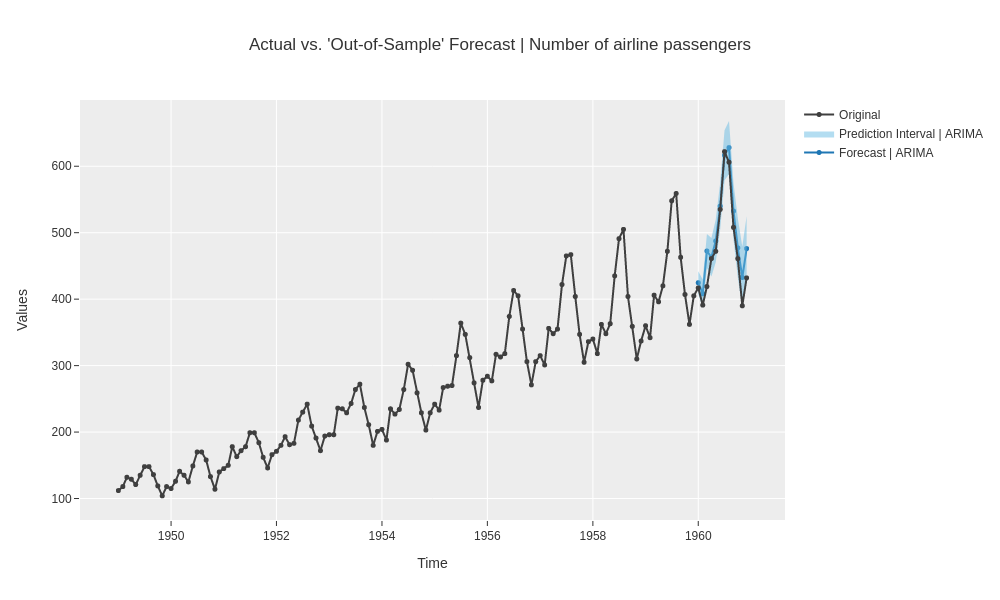

In [ ]:
exp.plot_model(estimator=model)


In [60]:
tuned_model = exp.tune_model(model)


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.4542,0.5092,13.2626,16.6689,0.0331,0.0339,0.9096
1,1957-12,0.6270,0.6285,19.1686,21.3384,0.0530,0.0513,0.8807
2,1958-12,0.7417,0.7222,21.1925,23.4747,0.0491,0.0506,0.8767
Mean,NaT,0.6076,0.6200,17.8746,20.4940,0.0451,0.0453,0.8890
SD,NaT,0.1182,0.0871,3.3642,2.8419,0.0086,0.0080,0.0146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.6s finished


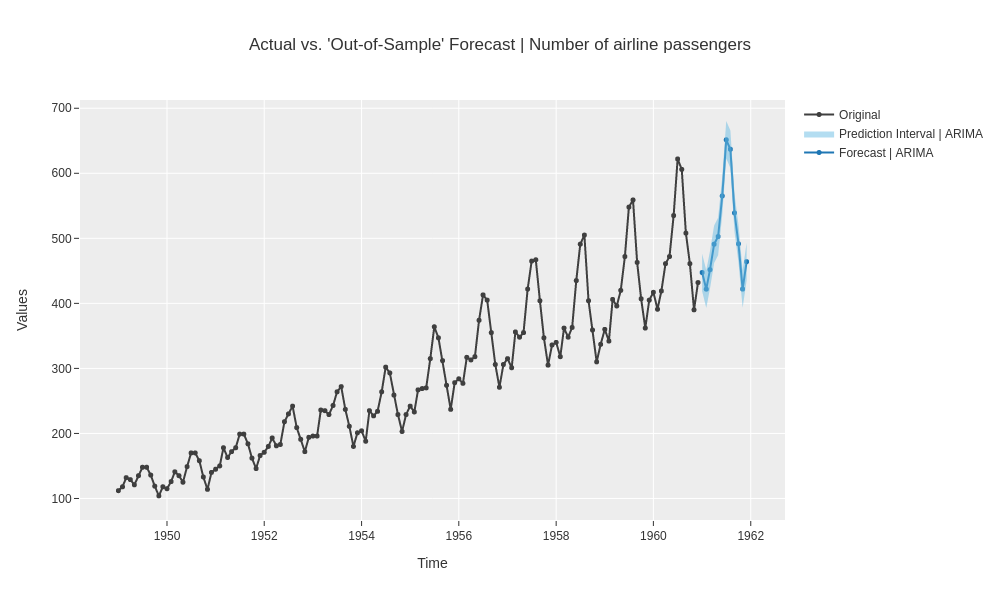

In [61]:
final_model = exp.finalize_model(tuned_model)
exp.plot_model(final_model)

In [ ]:
temp= exp.save_model(final_model, "my_final_model")

Transformation Pipeline and Model Successfully Saved
